## 1.1 数据操作

在深度学习中，我们通常会频繁地对数据进行操作。作为动手学深度学习的基础，本节将介绍如何对内存中的数据进行操作。

在PyTorch中，torch.Tensor是存储和变换数据的主要工具。如果你之前用过NumPy，你会发现Tensor和NumPy的多维数组非常类似。然而，Tensor提供GPU计算和自动求梯度等更多功能，这些使Tensor更加适合深度学习。

>"tensor"这个单词一般可译作“张量”，张量可以看作是一个多维数组。标量可以看作是0维张量，向量可以看作1维张量，矩阵可以看作是二维张量。

### 1.1.1 创建Tensor

In [1]:
import torch

然后我们创建一个5x3的未初始化的Tensor：

In [25]:
x = torch.empty(4, 4)
x

tensor([[9.9184e-39, 8.7245e-39, 9.2755e-39, 8.9082e-39],
        [9.9184e-39, 8.4490e-39, 9.6429e-39, 1.0653e-38],
        [1.0469e-38, 4.2246e-39, 1.0378e-38, 9.6429e-39],
        [9.2755e-39, 9.7346e-39, 1.0745e-38, 1.0102e-38]])

创建一个5x3的随机初始化的Tensor:

In [7]:
x = torch.rand(5,3)
x

tensor([[0.9600, 0.4103, 0.0539],
        [0.7864, 0.5885, 0.4117],
        [0.5964, 0.8384, 0.2455],
        [0.7634, 0.0676, 0.9139],
        [0.0136, 0.4442, 0.3324]])

创建一个5x3的long型全0的Tensor:

In [12]:
x = torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

还可以直接根据数据创建:

In [13]:
x = torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

还可以通过现有的Tensor来创建，此方法会默认重用输入Tensor的一些属性，例如数据类型。

In [30]:
x = x.new_ones(5,3,dtype=torch.float64)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [32]:
x = torch.randn_like(x,dtype=torch.float)
x

tensor([[ 1.8540,  0.1141,  1.2425],
        [ 1.0320, -0.1981, -1.8309],
        [-0.0607,  0.2472,  1.2684],
        [-0.4542, -0.6715,  0.5657],
        [ 1.0306,  1.4665,  0.6196]])

我们可以通过shape或者size()来获取Tensor的形状:

In [33]:
x.shape

torch.Size([5, 3])

In [34]:
x.size()

torch.Size([5, 3])

> 注意：返回的torch.Size其实就是一个tuple, 支持所有tuple的操作。

还有很多函数可以创建Tensor，去翻翻官方API就知道了，下表给了一些常用的作参考。

|函数|功能|
|:--:|:--:|
|Tensor(*sizes)|	基础构造函数|
|tensor(data,)|	类似np.array的构造函数|
|ones(*sizes)|	全1Tensor|
|zeros(*sizes)|	全0Tensor|
|eye(*sizes)|	对角线为1，其他为0|
|arange(s,e,step)|	从s到e，步长为step|
|linspace(s,e,steps)|	从s到e，均匀切分成steps份|
|rand/randn(*sizes)	|均匀/标准分布|
|normal(mean,std)/uniform(from,to)|	正态分布/均匀分布|
|randperm(m)|	随机排列|

这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu)。

### 1.1.2 操作

#### 算数操作

+ 加法形式一

In [43]:
x = torch.arange(9,0,-1).reshape(3,3)
y = torch.arange(1,10).reshape(3,3)
x + y

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])

+ 加法形式二

In [44]:
print(torch.add(x,y))

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])


还可指定输出到某个变量：

In [50]:
result = torch.empty(3,3)
torch.add(x,y,out=result)
result

tensor([[10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.]])

+ 加法形式三 内置函数

In [51]:
y.add_(x)
y

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])

> 注：PyTorch操作inplace版本都有后缀_, 例如x.copy_(y), x.t_()

#### 索引

我们还可以使用类似NumPy的索引操作来访问Tensor的一部分，需要注意的是：**索引出来的结果与原数据共享内存，也即修改一个，另一个会跟着修改**。

In [53]:
x

tensor([[9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]])

In [56]:
x_change = x[0,:]
x_change += 1
x_change

tensor([11, 10,  9])

In [57]:
x[0,:]

tensor([11, 10,  9])

除了常用的索引选择数据之外，PyTorch还提供了一些高级的选择函数:

|函数	|功能|
|:--:|:--:|
|index_select(input, dim, index)	|在指定维度dim上选取，比如选取某些行、某些列|
|masked_select(input, mask)	|例子如上，a[a>0]，使用ByteTensor进行选取|
|nonzero(input)|	非0元素的下标|
|gather(input, dim, index)|	根据index，在dim维度上选取数据，输出的size与index一样|

#### 改变形状

用view()来改变Tensor的形状：

In [63]:
x

tensor([[11, 10,  9],
        [ 6,  5,  4],
        [ 3,  2,  1]])

In [65]:
y = x.view(9)
y

tensor([11, 10,  9,  6,  5,  4,  3,  2,  1])

In [ ]:
z = x.view(-1,3)
# -1所指的维度可以根据其他维度的值推出来
z

注意view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。(顾名思义，**view仅仅是改变了对这个张量的观察角度，内部数据并未改变**)

所以如果我们想返回一个真正新的副本（即不共享data内存）该怎么办呢？Pytorch还提供了一个reshape()可以改变形状，但是此函数并不能保证返回的是其拷贝，**所以不推荐使用**。推荐先用clone创造一个副本然后再使用view。

In [75]:
x_cp = x.clone().view(9)
x -= 1
x

tensor([[10,  9,  8],
        [ 5,  4,  3],
        [ 2,  1,  0]])

In [76]:
x_cp

tensor([11, 10,  9,  6,  5,  4,  3,  2,  1])

> 使用clone还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源Tensor。

另外一个常用的函数就是item(), 它可以将一个标量Tensor转换成一个Python number：

In [77]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.5595])
-1.5595136880874634


#### 线性代数

另外，PyTorch还支持一些线性函数，这里提一下，免得用起来的时候自己造轮子，具体用法参考官方文档。如下表所示：

|函数	|功能|
|:--:|:--:|
|trace|	对角线元素之和(矩阵的迹)|
|diag	|对角线元素|
|triu/tril	|矩阵的上三角/下三角，可指定偏移量|
|mm/bmm|	矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/baddbmm..	|矩阵运算|
|t	|转置|
|dot/cross	|内积/外积|
|inverse|	求逆矩阵|
|svd	|奇异值分解|

PyTorch中的Tensor支持超过一百种操作，包括转置、索引、切片、数学运算、线性代数、随机数等等

### 1.1.3 广播机制

前面我们看到如何对两个形状相同的Tensor做按元素运算。当对两个形状不同的Tensor按元素运算时，可能会触发广播（broadcasting）机制：先适当复制元素使这两个Tensor形状相同后再按元素运算。例如：

In [81]:
x = torch.arange(1,3).view(1,2)
x

tensor([[1, 2]])

In [82]:
y = torch.arange(1,4).view(3,1)
y

tensor([[1],
        [2],
        [3]])

In [83]:
x+y

tensor([[2, 3],
        [3, 4],
        [4, 5]])

由于x和y分别是1行2列和3行1列的矩阵，如果要计算x + y，那么x中第一行的2个元素被广播（复制）到了第二行和第三行，而y中第一列的3个元素被广播（复制）到了第二列。如此，就可以对2个3行2列的矩阵按元素相加。

### 1.1.4 运算的内存开销

前面说了，索引操作是不会开辟新内存的，而像y = x + y这样的运算是会新开内存的，然后将y指向新内存。为了演示这一点，我们可以使用Python自带的id函数：如果两个实例的ID一致，那么它们所对应的内存地址相同；反之则不同。

In [84]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y = y + x
id(y) == id(id_before)

False

如果想指定结果到原来的y的内存，我们可以使用前面介绍的索引来进行替换操作。在下面的例子中，我们把x + y的结果通过[:]写进y对应的内存中。

In [86]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x
id(y) == id_before

True

我们还可以使用运算符全名函数中的out参数或者自加运算符+=(也即add_())达到上述效果，例如torch.add(x, y, out=y)和y += x(y.add_(x))。

In [87]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
torch.add(x, y, out=y) # y += x, y.add_(x)
id(y) == id_before

True

> 注：虽然view返回的Tensor与源Tensor是共享data的，但是依然是一个新的Tensor（因为Tensor除了包含data外还有一些其他属性），二者id（内存地址）并不一致。

### 1.1.5 Tensor和NumPy相互转换

我们很容易用numpy()和from_numpy()将Tensor和NumPy中的数组相互转换。但是需要注意的一点是： 这两个函数所产生的的Tensor和NumPy中的数组共享相同的内存（所以他们之间的转换很快），改变其中一个时另一个也会改变！！！

> 有一个常用的将NumPy中的array转换成Tensor的方法就是torch.tensor(), 需要注意的是，此方法总是会进行数据拷贝（就会消耗更多的时间和空间），所以返回的Tensor和原来的数据不再共享内存。

#### Tensor转NumPy
使用numpy()将Tensor转换成NumPy数组:

In [89]:
a = torch.ones(5)
b = a.numpy()
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


#### NumPy数组转Tensor
使用from_numpy()将NumPy数组转换成Tensor:

In [91]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


所有在CPU上的Tensor（除了CharTensor）都支持与NumPy数组相互转换。

此外上面提到还有一个常用的方法就是直接用torch.tensor()将NumPy数组转换成Tensor，需要注意的是该方法总是会进行数据拷贝，返回的Tensor和原来的数据不再共享内存。

In [92]:
c = torch.tensor(a)
a += 1
print(a, c)


[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


### 1.1.6 Tensor on GPU
用方法to()可以将Tensor在CPU和GPU（需要硬件支持）之间相互移动。

## 1.2 自动求梯度
在深度学习中，我们经常需要对函数求梯度（gradient）。PyTorch提供的autograd包能够根据输入和前向传播过程自动构建计算图，并执行反向传播。本节将介绍如何使用autograd包来进行自动求梯度的有关操作。

### 1.2.1 概念
上一节介绍的Tensor是这个包的核心类，如果将其属性.requires_grad设置为True，它将开始追踪(track)在其上的所有操作（这样就可以利用链式法则进行梯度传播了）。完成计算后，可以调用.backward()来完成所有梯度计算。此Tensor的梯度将累积到.grad属性中。

> |          注意在y.backward()时，如果y是标量，则不需要为backward()传入任何参数；否则，需要传入一个与y同形的Tensor。解释见 1.2.2 节。

如果不想要被继续追踪，可以调用.detach()将其从追踪记录中分离出来，这样就可以防止将来的计算被追踪，这样梯度就传不过去了。此外，还可以用with torch.no_grad()将不想被追踪的操作代码块包裹起来，这种方法在评估模型的时候很常用，因为在评估模型时，我们并不需要计算可训练参数（requires_grad=True）的梯度

Function是另外一个很重要的类。Tensor和Function互相结合就可以构建一个记录有整个计算过程的有向无环图（DAG）。每个Tensor都有一个.grad_fn属性，该属性即创建该Tensor的Function, 就是说该Tensor是不是通过某些运算得到的，若是，则grad_fn返回一个与这些运算相关的对象，否则是None。

下面通过一些例子来理解这些概念。

### 1.2.2 Tensor
创建一个Tensor并设置requires_grad=True:

In [4]:
import torch
x = torch.ones(2,2,requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


再做一下运算操作：

In [5]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


注意x是直接创建的，所以它没有grad_fn, 而y是通过一个加法操作创建的，所以它有一个为 **AddBackward** 的grad_fn。

像x这种直接创建的称为**叶子节点**，叶子节点对应的grad_fn是None。

In [6]:
print(x.is_leaf, y.is_leaf) # True False

True False


再来点复杂度运算操作：

In [7]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


通过.requires_grad_()来用in-place的方式改变requires_grad属性

In [23]:
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False
a.requires_grad_(True)
print(a.requires_grad) # True
b = (a * a).sum()
print(b.grad_fn)

False
True


### 1.2.3 梯度

因为out是一个标量，所以调用backward()时不需要指定求导变量：

In [24]:
out

tensor(27., grad_fn=<MeanBackward0>)

我们来看看out关于x的梯度  **d(out)/dx**

In [29]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


x   $\mapsto$   y   $\mapsto$   z    $\mapsto$ out

注意：grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零。

In [31]:
# 再来反向传播一次，注意grad是累加的
out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])
tensor([[1., 1.],
        [1., 1.]])


为了避免向量（甚至更高维张量）对张量求导，而转换成标量对张量求导

我们不允许张量对张量求导，只允许标量对张量求导，求导结果是和自变量同形的张量。

所以必要时我们要把张量通过将所有张量的元素加权求和的方式转换为标量

来看一些实际例子。

In [2]:
x = torch.tensor([1.,2.,3.,4.],requires_grad=True)
y = 2 * x
z = y.view(2,2)
print(z)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward0>)


现在 z 不是一个标量，所以在调用backward时需要传入一个和z同形的权重向量进行加权求和得到一个标量。

## 2.2 线性回归的从零开始实现

在了解了线性回归的背景知识之后，现在我们可以动手实现它了。尽管强大的深度学习框架可以减少大量重复性工作，但若过于依赖它提供的便利，会导致我们很难深入理解深度学习是如何工作的。因此，本节将介绍如何只利用Tensor和autograd来实现一个线性回归的训练。

首先，导入本节中实验所需的包或模块，其中的matplotlib包可用于作图，且设置成嵌入显示。

In [65]:
import matplotlib_inline
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

### 2.2.1 生成数据集
我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 X∈R1000×2
 ，我们使用线性回归模型真实权重 w=[2,−3.4] 和偏差 b=4.2b=4.2，以及一个随机噪声项 ϵ来生成标签

y=Xw+b+ϵ

其中噪声项 ϵ 服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。下面，让我们生成数据集。

In [87]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
# 生成 x1;x2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)

>以下是关于 torch.randn()的用法

torch.randn:用来生成随机数字的tensor，这些随机数字满足标准正态分布（0~1）。
torch.randn（size),size可以是一个整数，也可以是一个元组。

In [88]:
torch.randn(3)

tensor([ 1.1099, -2.0863,  0.3111])

In [89]:
torch.randn(3,4)

tensor([[-0.3300,  1.3439,  0.7681, -0.5909],
        [ 1.2094,  0.3854,  1.7493, -1.1119],
        [ 0.5326,  1.4275, -0.3567,  0.0686]])

In [90]:
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
## 添加噪声
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

注意，features的每一行是一个长度为2的向量，而labels的每一行是一个长度为1的向量（标量）。

In [91]:
print(features[0], labels[0])

tensor([-0.1214,  0.8758]) tensor(0.9876)


通过生成第二个特征features[:, 1]和标签 labels 的散点图，可以更直观地观察两者间的线性关系。

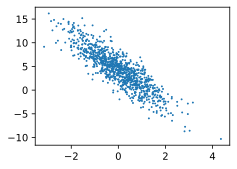

In [92]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

### 2.2.2 读取数据
在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。

In [103]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))# 获取[0,1,...,999]
    random.shuffle(indices)# shuffle() 方法将序列的所有元素随机排序
    for i in range(0,num_examples,batch_size):
        # LongTensor化为Long形态
        # 最后一次可能不足一个batch
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])
        yield  features.index_select(0, j), labels.index_select(0, j)      

In [94]:
xxxx = torch.ones(4,5)
len(xxxx)

4

In [100]:
xxxx = list(range(4))
xxxx

[0, 1, 2, 3]

In [102]:
random.shuffle(xxxx)
xxxx

[3, 2, 0, 1]

index_select() 中第一个参数 0 表示以行为标准选择，例如j = tensor([1,2]),结果为选取features 第1，第2行数据

让我们读取第一个小批量数据样本并打印。每个批量的特征形状为(10, 2)，分别对应批量大小和输入个数；标签形状为批量大小。

In [105]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.9958, -0.6996],
        [-0.5632,  1.1328],
        [-0.0275,  0.0999],
        [ 2.9715, -0.3251],
        [ 0.9433,  1.1843],
        [ 0.7848, -1.3777],
        [-0.1955,  0.5261],
        [-1.7049,  1.0759],
        [ 0.6569, -1.6245],
        [ 1.5461, -0.5355]]) tensor([ 4.5925, -0.7767,  3.8093, 11.2514,  2.0674, 10.4601,  2.0121, -2.8456,
        11.0490,  9.1312])


### 2.2.3 初始化模型参数
我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。

In [106]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们要让它们的requires_grad=True。

In [107]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

### 2.2.4 定义模型
下面是线性回归的矢量计算表达式的实现。我们使用mm函数做矩阵乘法。

In [109]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

torch.mm(a, b) 是矩阵a和b矩阵相乘，比如a的维度是(1, 2)，b的维度是(2, 3)，返回的就是(1, 3)的矩阵。这个操作很熟悉了，这就是很常用的矩阵运算。

### 2.2.5 定义损失函数
我们使用上一节描述的平方损失来定义线性回归的损失函数。在实现中，我们需要把真实值y变形成预测值y_hat的形状。以下函数返回的结果也将和y_hat的形状相同。

In [110]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 2.2.6 定义优化算法
以下的sgd函数实现了上一节中介绍的小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。

In [111]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data